In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.8 MB 2.6 MB/s eta 0:00:03
   -------- ------------------------------- 1.6/7.8 MB 2.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/7.8 MB 2.4 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 2.4 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.8 MB 2.4 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 2.4 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 2.4 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 2.4 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/7.8 MB 2.4 MB/s eta 0:00:02
   ----------------------------- --------

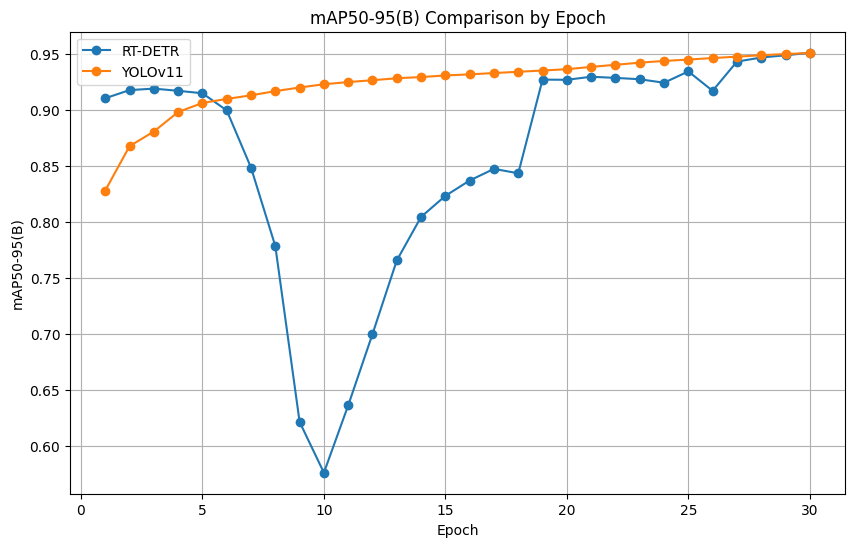

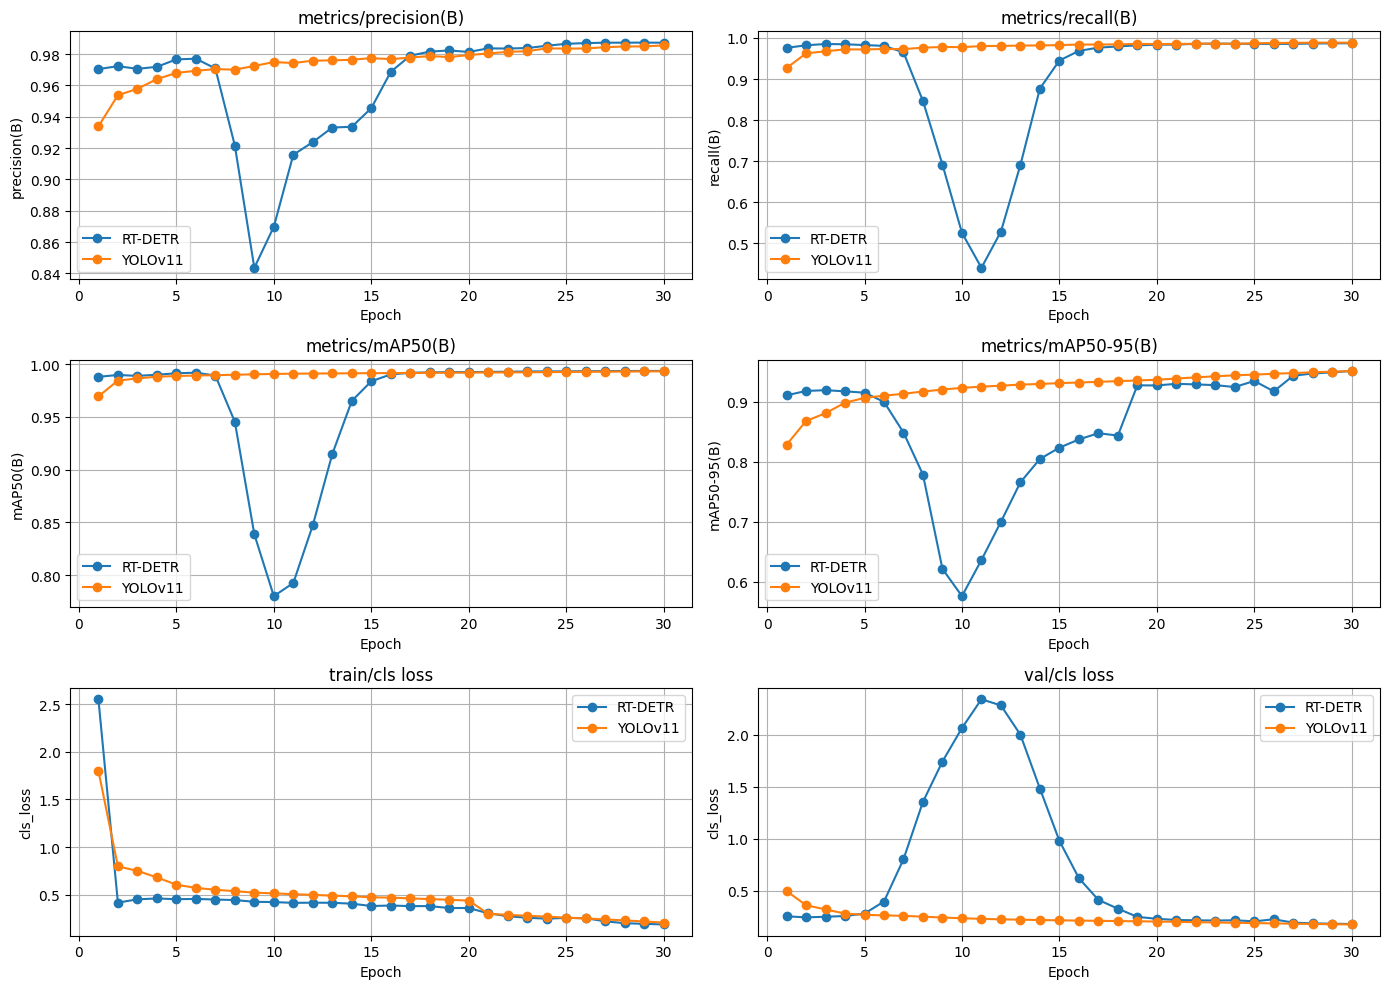

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_rtdetr = '../result/results_rtdetr_30.csv'
file_yolov11 = '../result/results_yolov11_30.csv'

# CSV 파일 읽기
df_rtdetr = pd.read_csv(file_rtdetr)
df_yolov11 = pd.read_csv(file_yolov11)

# mAP50-95(B) epoch 별 비교
plt.figure(figsize=(10, 6))
plt.plot(df_rtdetr['epoch'], df_rtdetr['metrics/mAP50-95(B)'], label='RT-DETR', marker='o')
plt.plot(df_yolov11['epoch'], df_yolov11['metrics/mAP50-95(B)'], label='YOLOv11', marker='o')
plt.xlabel('Epoch')
plt.ylabel('mAP50-95(B)')
plt.title('mAP50-95(B) Comparison by Epoch')
plt.legend()
plt.grid()
plt.savefig('../result/mAP50-95_comparison.png')  # 그래프 저장
plt.show()

# Precision, Recall, mAP50, mAP50-95, train/l1_loss, val/l1_loss epoch 별 그래프
columns = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 
           'metrics/mAP50-95(B)', 'train/cls_loss', 'val/cls_loss']

plt.figure(figsize=(14, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(df_rtdetr['epoch'], df_rtdetr[col], label='RT-DETR', marker='o')
    plt.plot(df_yolov11['epoch'], df_yolov11[col], label='YOLOv11', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel(col.split('/')[-1])  # 간단한 축 라벨
    plt.title(col.replace('_', ' '))  # 제목에 언더스코어 제거
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.savefig('../result/epoch_comparison_metrics.png')  # 여러 그래프 저장
plt.show()


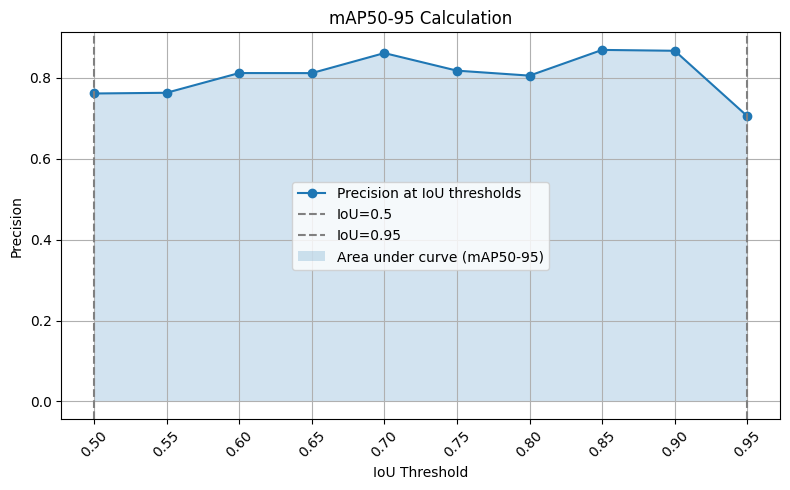

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# IoU thresholds
iou_thresholds = np.linspace(0.5, 0.95, 10)

# Example precision values (hypothetical for visualization purposes)
precision_values = np.random.uniform(0.7, 0.9, len(iou_thresholds))

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(iou_thresholds, precision_values, marker='o', label='Precision at IoU thresholds')

# Add labels, title, and grid
plt.title('mAP50-95 Calculation')
plt.xlabel('IoU Threshold')
plt.ylabel('Precision')
plt.xticks(iou_thresholds, [f"{t:.2f}" for t in iou_thresholds], rotation=45)
plt.axvline(x=0.5, color='gray', linestyle='--', label='IoU=0.5')
plt.axvline(x=0.95, color='gray', linestyle='--', label='IoU=0.95')
plt.fill_between(iou_thresholds, 0, precision_values, alpha=0.2, label='Area under curve (mAP50-95)')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
